## AI Project UCS415 
#### Finding Popularity of Spotify Songs
Predicting which songs will have a popularity score over 72.5 using KNN 

Nitansh Jain  102017025

In [2916]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2917]:
spotify_df = pd.read_csv('top10s.csv', encoding='latin-1')
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [2918]:
# checking if any null values are present
print(spotify_df.isnull().sum())

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64


In [2919]:
spotify_df.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [2920]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,Unnamed: 0,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [2921]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df

# dropping column added and top year from dataframe
spotify_features.drop(['title', 'Unnamed: 0'], axis=1, inplace=True)
spotify_df.head()


,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [2922]:
# checking correlation table
spotify_features.head()
spotify_features.corr(method='pearson')

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
year,1.000000,-0.104247,-0.225596,0.079269,-0.126471,-0.136331,-0.122025,-0.215344,0.101725,0.004778,0.241261
bpm,-0.104247,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
nrgy,-0.225596,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
dnce,0.079269,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
dB,-0.126471,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,-0.136331,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
val,-0.122025,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
dur,-0.215344,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acous,0.101725,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704
spch,0.004778,0.058999,0.107313,-0.028041,-0.001110,0.144103,0.122013,0.054564,0.002763,1.000000,-0.041490


In [2923]:
from sklearn import preprocessing
le_artist = preprocessing.LabelEncoder()
le_artist.fit(spotify_features['artist'])
spotify_features['artist'] = le_artist.transform(spotify_features['artist'])

le_genre = preprocessing.LabelEncoder()
le_genre.fit(spotify_features['genre'])
spotify_features['genre'] = le_genre.transform(spotify_features['genre'])


In [2924]:
# splitting spotify_features into dependent and independent variables
spotify_features_x = spotify_features.drop(['popularity'], axis=1)
spotify_features_y = spotify_features['popularity']
print(spotify_features_x.head())

   artist  genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch
0     174     46  2010   97    89    67  -4     8   80  217     19     4
1      49     27  2010   87    93    75  -5    52   64  263     24    23
2      89     25  2010  120    84    76  -3    29   71  200     10    14
3      94     25  2010  119    92    70  -4     8   71  295      0     4
4      19     48  2010  109    84    64  -5     9   43  221      2     4


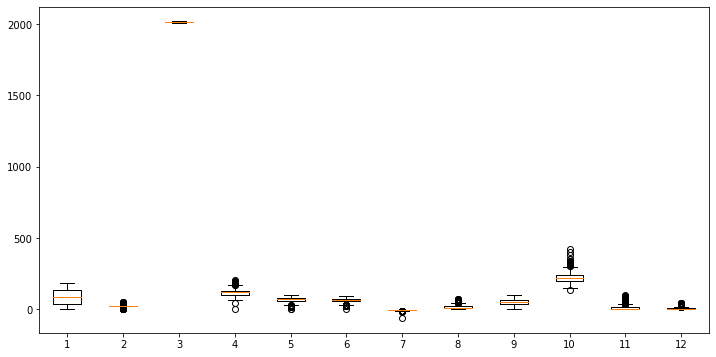

In [2925]:
# Visulaizing the data before normalization
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_x)
plt.show()

In [2926]:
# normalizing spotify_features using min_max scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
spotify_features_scaled_x = spotify_features_x
spotify_features_scaled_x.loc[:,'bpm':'spch'] = scaler.fit_transform(spotify_features_x.loc[:,'bpm':'spch'])
spotify_features_scaled_x[0:2]

,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,174,46,2010,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333
1,49,27,2010,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167


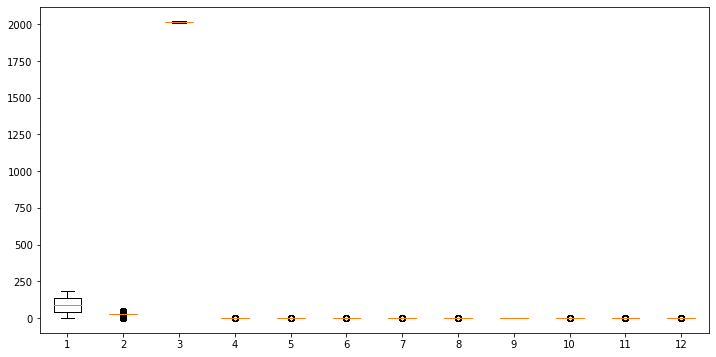

In [2927]:
# after normalization of data using min_max scaler
# xticks_values = [0,'artist', 'genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'artist_type']
# print(len(xticks_values))
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_scaled_x)
# plt.xticks(range(0,len(xticks_values)), xticks_values)
plt.show()


In [2928]:
spotify_features_x_np = spotify_features_scaled_x.loc[:,:]
print(spotify_features_x_np[0:2])

   artist  genre  year       bpm      nrgy      dnce        dB      live  \
0     174     46  2010  0.470874  0.908163  0.690722  0.965517  0.108108   
1      49     27  2010  0.422330  0.948980  0.773196  0.948276  0.702703   

        val       dur     acous      spch  
0  0.816327  0.286207  0.191919  0.083333  
1  0.653061  0.444828  0.242424  0.479167  


In [2929]:
spotify_features_y = np.where(spotify_features_y >= 75, 1, 0)
spotify_features_y[0:5]

array([1, 1, 1, 1, 1])

In [2930]:
spotify_features_scaled_y = scaler.fit_transform(spotify_features_y.reshape(-1,1))
spotify_features_scaled_y[0:2]

spotify_features_y_np = spotify_features_y
spotify_features_y_np[0:5]

array([1, 1, 1, 1, 1])

In [2931]:
print(spotify_features_x_np[0:2])
print(spotify_features_y_np[0:2])


   artist  genre  year       bpm      nrgy      dnce        dB      live  \
0     174     46  2010  0.470874  0.908163  0.690722  0.965517  0.108108   
1      49     27  2010  0.422330  0.948980  0.773196  0.948276  0.702703   

        val       dur     acous      spch  
0  0.816327  0.286207  0.191919  0.083333  
1  0.653061  0.444828  0.242424  0.479167  
[1 1]


In [2932]:
from sklearn.model_selection import train_test_split
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(spotify_features_x_np, spotify_features_y_np, test_size=0.25, random_state=42)

In [2933]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=5).fit(x_train_knn, y_train_knn)
n

KNeighborsClassifier()

In [2934]:
yhat_pred_knn = n.predict(x_test_knn)
print(yhat_pred_knn[0:20])
print(y_test_knn[0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0]
[1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0]


In [2935]:
from sklearn import metrics
metrics.accuracy_score(y_test_knn, yhat_pred_knn)

0.7483443708609272

In [2936]:
ks = 30
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_knn,y_train_knn)
    yhat = neigh.predict(x_test_knn)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn,yhat)
    std_acc[n-1] = np.std(yhat==y_test_knn)/np.sqrt(yhat.shape[0])
print(mean_acc)
print(np.where(mean_acc == np.max(mean_acc)))

[0.70860927 0.72847682 0.7218543  0.72847682 0.74834437 0.68874172
 0.70198675 0.69536424 0.68211921 0.69536424 0.70860927 0.70198675
 0.71523179 0.70198675 0.69536424 0.70198675 0.69536424 0.69536424
 0.68211921 0.70198675 0.68211921 0.71523179 0.69536424 0.68211921
 0.68211921 0.70860927 0.7218543  0.70198675 0.71523179]
(array([4]),)


In [2937]:
cm_knn = confusion_matrix(y_test_knn, yhat_pred_knn)
print(cm_knn)

[[94  8]
 [30 19]]


In [2938]:
print('Classification Report: \n', metrics.classification_report(y_test_knn, yhat_pred_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       102
           1       0.70      0.39      0.50        49

    accuracy                           0.75       151
   macro avg       0.73      0.65      0.67       151
weighted avg       0.74      0.75      0.72       151



In [2939]:
error_rate = []
for i in range(1,40):
    Obj = KNeighborsClassifier(n_neighbors = i)
    Obj.fit(x_train_knn,y_train_knn)
    pred_i = Obj.predict(x_test_knn)
    error_rate.append(np.mean(pred_i != y_test_knn))


Text(0, 0.5, 'Error Rate')

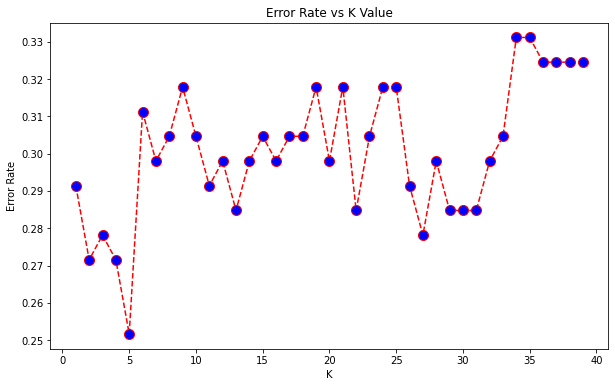

In [2940]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [2941]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, spotify_features_x_np, spotify_features_y_np, cv=10)
scores

array([0.68852459, 0.73770492, 0.73770492, 0.7       , 0.66666667,
       0.7       , 0.71666667, 0.66666667, 0.7       , 0.65      ])

In [2942]:
print('%.2f accuracy with a standard deviation of %.2f' % (np.mean(scores), np.std(scores)))

0.70 accuracy with a standard deviation of 0.03


In [2943]:
from sklearn.model_selection import cross_val_predict
yhat_pred_knn_cross_val = cross_val_predict(knn, spotify_features_x_np, spotify_features_y_np, cv=10)

In [2944]:
metrics.accuracy_score(spotify_features_y, yhat_pred_knn_cross_val)

0.6965174129353234

In [2945]:
cm_cross_val_score = confusion_matrix(spotify_features_y, yhat_pred_knn_cross_val)
print(cm_cross_val_score)

[[350  64]
 [119  70]]


In [2946]:
print('Classification Report: \n', metrics.classification_report(spotify_features_y, yhat_pred_knn_cross_val))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       414
           1       0.52      0.37      0.43       189

    accuracy                           0.70       603
   macro avg       0.63      0.61      0.61       603
weighted avg       0.68      0.70      0.68       603

